In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import os
import glob
from functools import reduce
import seaborn as sns

In [2]:
lc_u = np.load('uid_per_shb_fatigue(1).npy')

In [3]:
path = os.getcwd()+'/user_epoch/'
#path = os.getcwd()+'/extcoh/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

df_lcu = []
demo_info = []
uid = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    #for var in ['sleep', 'hr', 'steps']:
    #    if var not in df.columns:
    #        df[var] = np.nan
    df_lcu.append(df)
    demo_info.append(f.split("/")[-1].split('.')[0])
    uid.append(int(f.split("/")[-1].split('.')[1][1:])) 
      
sex = [re.split('(\d+)',demo_info[i])[0] for i in range(len(demo_info))]
age = [int(re.split('(\d+)',demo_info[i])[1]) for i in range(len(demo_info))] 

In [4]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(1,len(elements)+1):
        if i >= window_size:
            wi_days.append(elements[i-window_size:i])
        elif i < window_size:
            wi_days.append(elements[:i])
    return wi_days

In [5]:
lid = np.where(np.array(uid) ==  146789)[0][0]

In [6]:
age[lid]

45

In [7]:
sex[lid]

'female'

In [87]:
n = lid
df = df_lcu[n].copy()#dfs[0].copy()
df['start'] = pd.to_datetime(df['start'])

In [88]:
userid = uid[n]

In [89]:
df['dt'] = pd.to_datetime(df['dt'])
df['date'] = pd.to_datetime(df['date'])
mis_row = []
for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
    mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])


In [90]:
if len(mis_row) > 0:
    df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
df['day_totest'] = df['date'] - df['dt'].iloc[0]

In [91]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

In [92]:
df['start'] = pd.to_datetime(df['start']) 

In [93]:
#df['day_totest'] = pd.to_timedelta(df['day_totest']).dt.days

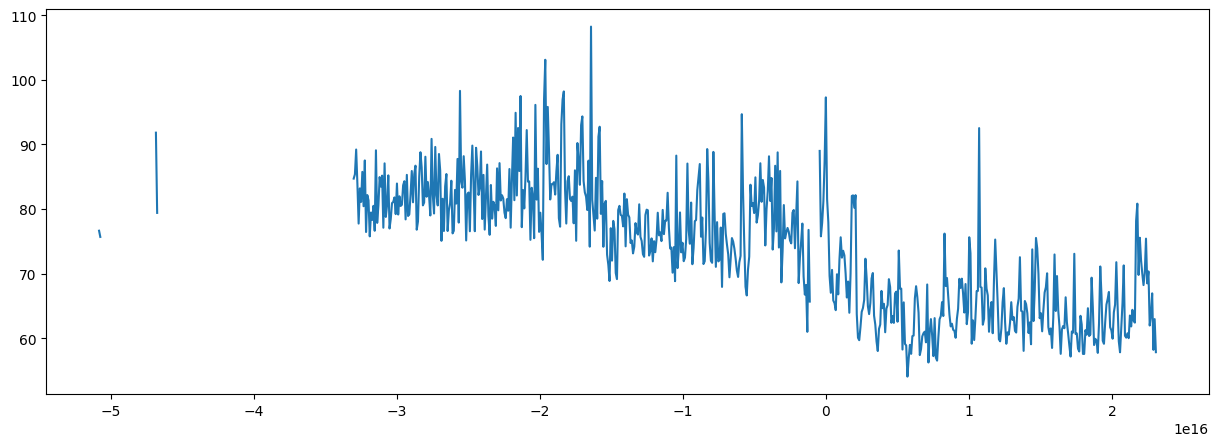

In [95]:
plt.figure(figsize=(15,5))
plt.plot(df.groupby('day_totest').mean()['hr'])
#plt.xlim(-200,200)

In [96]:
wi_list = sliding_window(df['date'].unique(),7)

In [97]:
dtt_list = sliding_window(df['day_totest'].unique(),7)

In [98]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(1,len(elements)+1):
        if i >= window_size:
            wi_days.append(elements[i-window_size:i])
        elif i < window_size:
            wi_days.append(elements[:i])
    return wi_days

In [99]:
len(dtt_list)

856

In [100]:
day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(1))

In [116]:
day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(1))
df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
wi_list = sliding_window(df['date'].unique(),7)
for wi in range(len(wi_list)):
    dm = get_md(df[df['date'].isin(wi_list[wi])])
     
    day_mean.loc[df['day_totest'].unique()[wi],0]  = dm
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

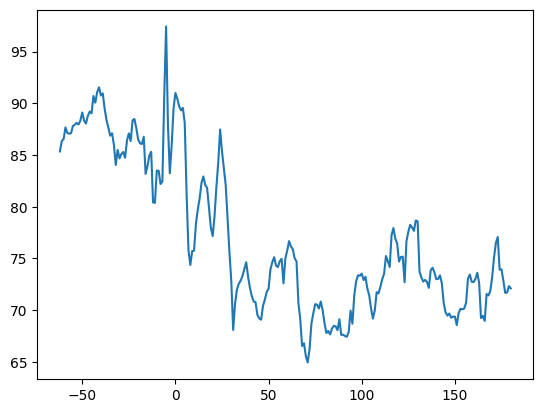

In [115]:
plt.plot(pd.to_timedelta(day_mean.index).days,day_mean)

In [108]:
wi

243

In [109]:
len(wi_list)

856

In [110]:
len(df['day_totest'].unique())

243

In [70]:
def get_md(subd):
    #subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd) > 0:
         
        day = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna()&(subd['steps']!=0)))]['hr'].dropna()
         
        
        return day.mean()
     